تیتر:پرکردن نواقص یک دیتاست با پیشبینی آن ها به کمک تحلیل آماری

توضیح پروژه:در این پروژه با استفاده از تخمین زدن مقدار خالی یک دیتاست را با استفاده از تحلیل آماری پر میکنیم


دیتا یک فایل 
csv
آپلود شده است

In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import time

سوال ۱

In [3]:
cars = pd.read_csv('FuelConsumptionCo2.csv')
print(cars.head())
print(cars.tail())
print(cars.describe(include='all'))

   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0        4.0          AS5        Z                   9.9                  6.7   
1        4.0           M6        Z                  11.2                  7.7   
2        4.0          AV7        Z                   6.0                  5.8   
3        6.0          AS6        Z                  12.7                  9.1   
4        6.0          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0             

تابع اول ۵ رکورد اول را نمایش میدهد
تابع دوم ۵ رکورد آخر را نمایش میدهد
تابع سوم نیز اطلاعاتی از قبیل میانگین و ماکس و مین را نمایش میدهد

سوال ۲

In [4]:
print(cars.info())
cleanup_type = {"FUELTYPE": {"Z": 0, "D": 1, "E": 2, "X": 3}}
cars = cars.replace(cleanup_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

این تابع اطلاعاتی از هر ستون دیتاست و تایپ آنها میدهد

با استفاده از دیکشنری هر دسته را باشماره ۰ تا ۳ برچسب گذاری میکنیم
و در خط بعدی در دیتا ست جایگزین میکنیم


سوال ۳

In [5]:
enginesize_nan = cars['ENGINESIZE'].isna().sum()
print('Count of ENGINESIZE NaN:'+str(enginesize_nan))
cylinders_nan = cars['CYLINDERS'].isna().sum()
print('Count of CYLINDERS NaN:'+str(cylinders_nan))
fueltype_nan = cars['FUELTYPE'].isna().sum()
print('Count of FUELTYPE NaN:'+str(fueltype_nan))
co2missios_nan = cars['CO2EMISSIONS'].isna().sum()
print('Count of CO2EMISSIONS NaN:'+str(co2missios_nan))

Count of ENGINESIZE NaN:27
Count of CYLINDERS NaN:34
Count of FUELTYPE NaN:71
Count of CO2EMISSIONS NaN:103


در هر خط تعداد سطر های خالی هر ستون رو نشان دادیم با استفاده از تابع
isna()
تعداد خانه های خالی هر ستون رو شمردیم
حال همه را با میانگین ستونشان جایگزین میکنیم غیر از ستون آخر(هدف)

In [6]:
mean_enginsize = cars['ENGINESIZE'].mean()
cars['ENGINESIZE'].fillna(value=mean_enginsize, inplace=True)
mean_cylinders = cars['CYLINDERS'].mean()
cars['CYLINDERS'].fillna(value=mean_cylinders, inplace=True)
mean_fueltype = cars['FUELTYPE'].mean()
cars['FUELTYPE'].fillna(value=mean_fueltype, inplace=True)

مزایای این روش سریع بودن و ساده بودن آن است اما دقت کافی را ندارد 
و ممکن است عدد جاگزین شده با عدد اصلی تفاوت زیادی داشته باشد


In [7]:
new_cars = cars[cars['CO2EMISSIONS'].isna()]
cars.dropna(subset=['CO2EMISSIONS'])
cars = cars[cars['CO2EMISSIONS'].notna()]
cars = cars.reset_index()

سطرهایی که ستون هدف آنها خالی است را جدا کردیم و در یک دیتافریم دیگر ریختیم
در آخر دیتا ست را رفرش کردیم تا ترتیب شماره ها درست شود


سوال ۴

In [8]:
start1 = time.time()
CarsLower240 = cars[cars['CO2EMISSIONS'] < 240]
mean_cars_lower_240 = CarsLower240['FUELCONSUMPTION_CITY'].mean()
print("avrage FUELCONSUMPTION_CITY for co2<240="+str(mean_cars_lower_240))
CarsMoreThan300 = cars[cars['CO2EMISSIONS'] > 300]
mean_cars_more_than_300 = CarsMoreThan300['FUELCONSUMPTION_CITY'].mean()
print("avrage FUELCONSUMPTION_CITY for co2>300="+str(mean_cars_more_than_300))
stop1 = time.time()

avrage FUELCONSUMPTION_CITY for co2<240=10.03781902552204
avrage FUELCONSUMPTION_CITY for co2>300=18.663255813953487


برای محاسبه تایم پردازش تایم شروع را در متغیری ثبت میکنیم
سطر هایی که مصرف سوختشان در شهر کمتر از ۲۴۰ باشد را در دیتاست دیگر ذخیره میکنیم
برای بالای ۳۰۰ هم همینطور در دیتاست دیگری ذخیره میکنیم
میانگین تولید کربن دی اکسید این دو را محاسبه و چاپ میکنیم
در آخر هم تایم پردازش را محاسبه میکنیم


سوال ۵

In [10]:
start2 = time.time()
number = len(cars)
sum = 0
n = 0
for i in range(number):
    if cars['CO2EMISSIONS'][i] < 240:
        n += 1
        sum += cars['FUELCONSUMPTION_CITY'][i]
mean_cars_lower_240 = sum/n
n=0
sum=0
for i in range(number):
    if cars['CO2EMISSIONS'][i] > 300:
        n += 1
        sum += cars['FUELCONSUMPTION_CITY'][i]
mean_cars_more_than_300 = sum/n
stop2 = time.time()
print("with For:avrage FUELCONSUMPTION_CITY for co2<240="+str(mean_cars_lower_240))
print("with For:avrage FUELCONSUMPTION_CITY for co2>300=" +str(mean_cars_more_than_300))

with For:avrage FUELCONSUMPTION_CITY for co2<240=10.037819025522042
with For:avrage FUELCONSUMPTION_CITY for co2>300=18.663255813953487


با استفاده از حلقه در ستون حرکت میکنیم  و میانگین تولید کربن دی اکسید را برای هرکدام که لازم باشد حساب میکنیم


In [11]:
print('time vectorization='+str(stop1-start1))
print('time For='+str(stop2-start2))

time vectorization=0.007380962371826172
time For=0.019090652465820312


زمان انجام وکتورزیشن بسیار سریع تر از حلقه میباشد زیرا عملیات هارا
در دیتاست به صورت موازی انجام میدهد که سرعت برنامه را بالا میبرد


سوال ۶

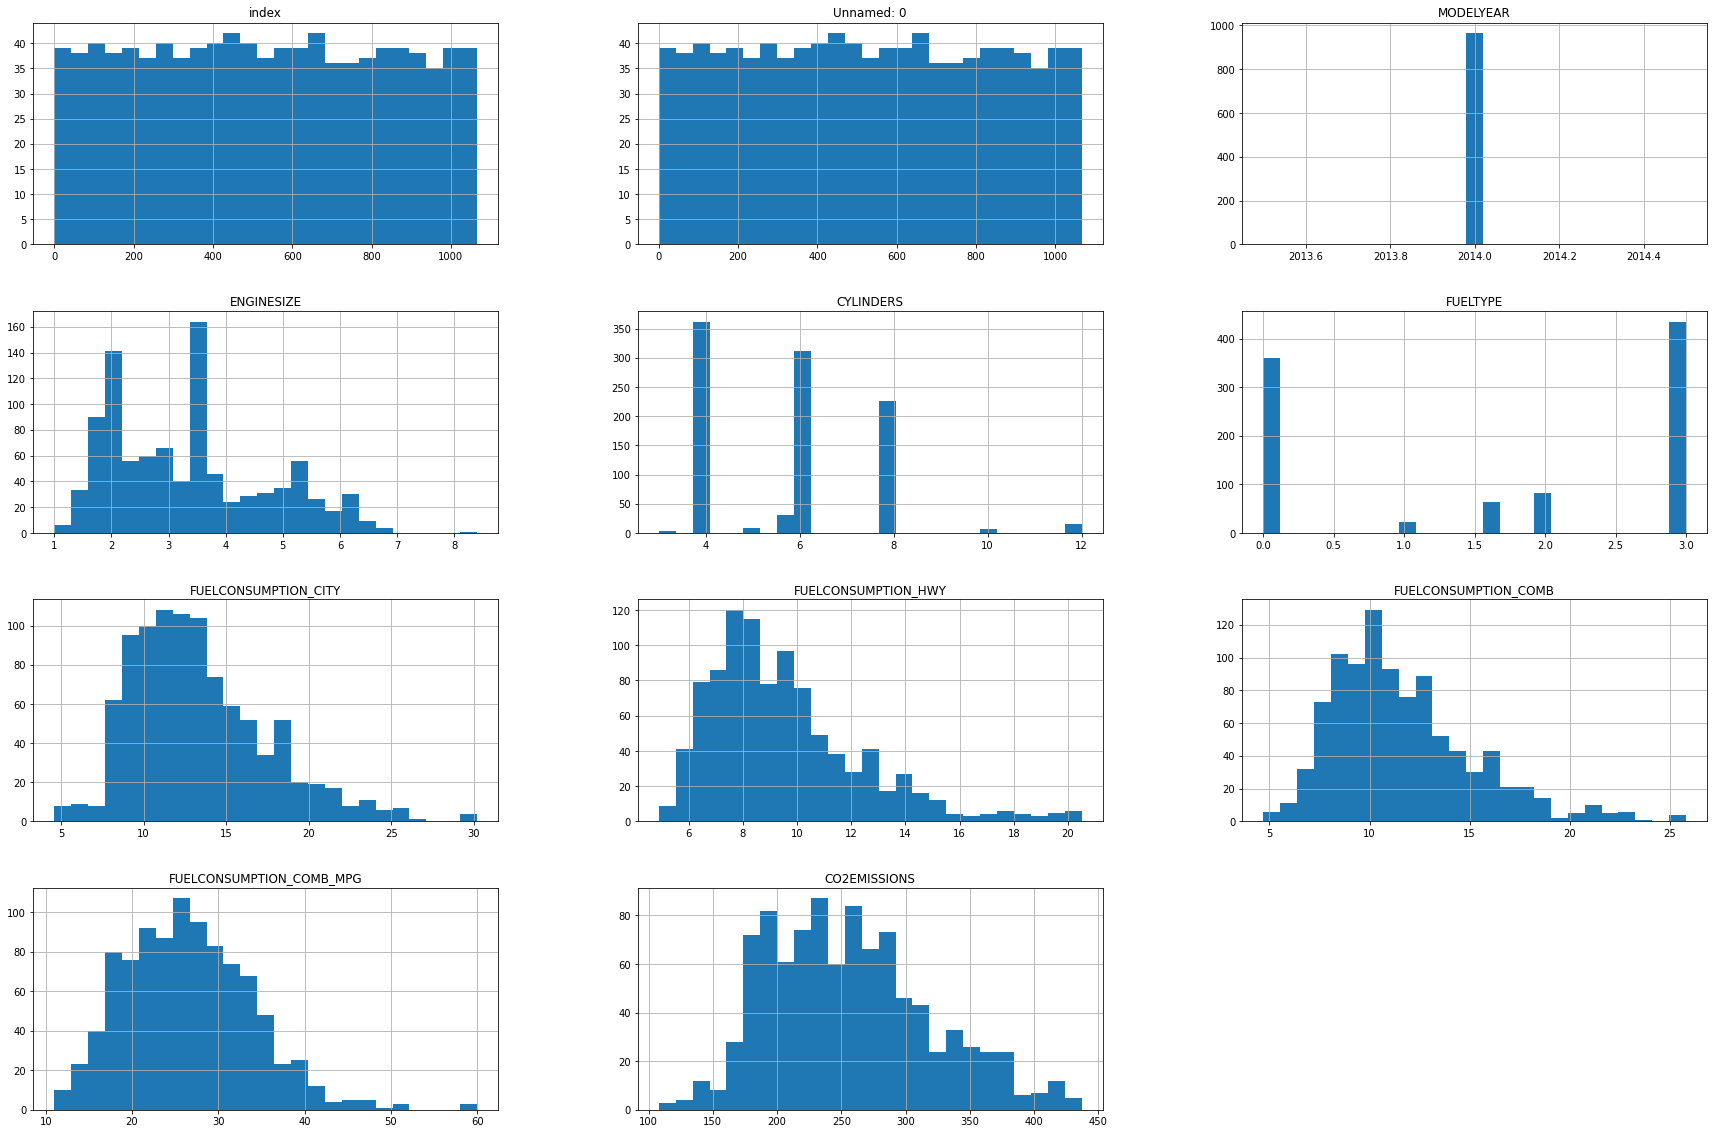

In [12]:
hist = cars.hist(bins=25, figsize=(30, 20))

در اینجا نمونه آماری هر کدام از ستون هارا مشاهده میکنیم


سوال ۷

In [13]:
cars_num = cars.select_dtypes(include=[np.number])
cars_normal = (cars_num-cars_num.mean())/cars_num.std()

برای بهبود مدلهای یادگیری ماشین دیتاست رو نرمالسازی میکنیم  با روش کم کردن میانگین و تقسیم بر انحراف معیار

سوال ۸

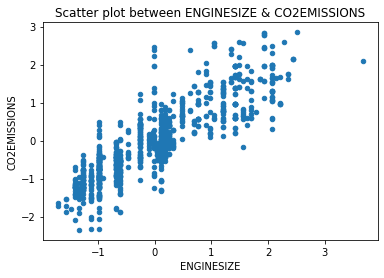

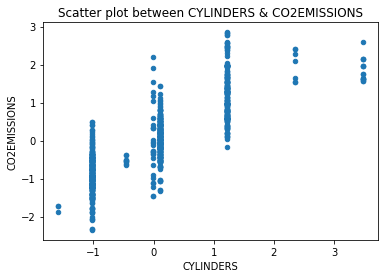

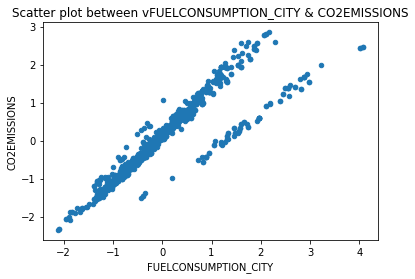

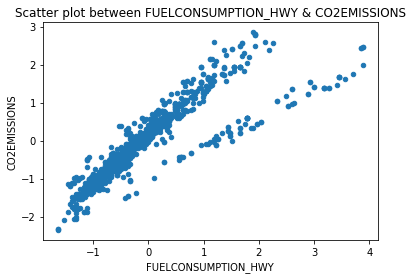

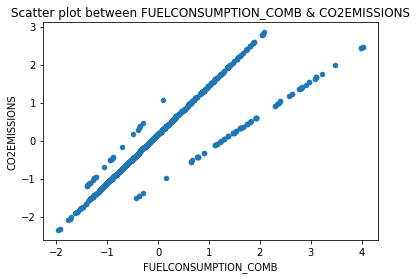

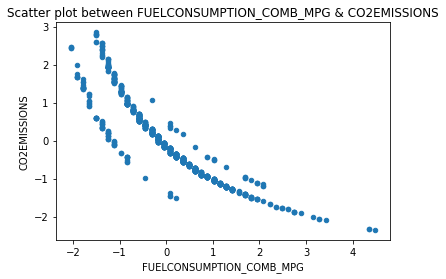

In [14]:
chart1 = cars_normal.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', title="Scatter plot between ENGINESIZE & CO2EMISSIONS")
chart2 = cars_normal.plot.scatter(x='CYLINDERS', y='CO2EMISSIONS', title="Scatter plot between CYLINDERS & CO2EMISSIONS")
chart3 = cars_normal.plot.scatter(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS',title="Scatter plot between vFUELCONSUMPTION_CITY & CO2EMISSIONS")
chart4 = cars_normal.plot.scatter(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS',title="Scatter plot between FUELCONSUMPTION_HWY & CO2EMISSIONS")
chart5 = cars_normal.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS',title="Scatter plot between FUELCONSUMPTION_COMB & CO2EMISSIONS")
chart6 = cars_normal.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS',title="Scatter plot between FUELCONSUMPTION_COMB_MPG & CO2EMISSIONS")

 مقدار مصرف سوخت ترکیبی با مقدار کربن دی اکسید خروجی همبستگی زیادی دارد
 زیرا نمودار آن خطی میباشد

سوال ۹

In [18]:
linear = cars_normal[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = linear['FUELCONSUMPTION_COMB']
Y = linear['CO2EMISSIONS']
X_mat = np.vstack((np.ones(len(X)), X)).T
# Beta_hat=((xT*X)**-1)*xT*y
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
y_hat = X_mat.dot(beta_hat)

با استفاده از ماتریس و معادله ای که کامنت شده تتا۱وتتا۰ را محاسبه میکنیم

سوال ۱۰

In [22]:
MSE = np.square(np.subtract(Y, y_hat)).mean()
print('MSE='+str(MSE))

MSE=0.2100171470129475


سوال ۱۱

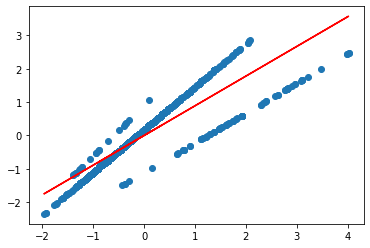

In [23]:
mp.scatter(X, Y)
mp.plot(X, y_hat, color='red')

خط قرمزی خطی است که ما شیبش را تشخیص دادیم که با کمی خطا میباشد

سوال ۱۲

In [24]:
new_cars_num = new_cars.select_dtypes(include=[np.number])
new_cars_normal = (new_cars_num-new_cars_num.mean())/new_cars_num.std()
new_linear = new_cars_normal[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
new_x = new_linear['FUELCONSUMPTION_COMB']
new_y = new_linear['CO2EMISSIONS']
new_x_mat = np.vstack((np.ones(len(new_x)), new_x)).T
new_y_hat = new_x_mat.dot(beta_hat)
new_linear = new_linear.reset_index()
new_linear['CO2EMISSIONS'] = new_y_hat
new_linear.to_csv('1.csv')